<a href="https://colab.research.google.com/github/danielapavas/Optimizacion/blob/main/Metodo_de_bisecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

METODO DE BISECCIÓN



In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def biseccion(funcion, a, b, tolerance, maximo):
    if funcion(a) * funcion(b) >= 0:
        raise ValueError("La función no cumple con el teorema de Bolzano en el intervalo dado.")

    i = 0
    while (b - a) / 2 > tolerance and i < maximo:
        mitad = (a + b) / 2
        if funcion(mitad) == 0:
            return mitad
        elif funcion(mitad) * funcion(a) < 0:
            b = mitad
        else:
            a = mitad

        i += 1

    return (a + b) / 2

In [5]:
def ejemplo(x):
    return x**2 - 4

a = 1.0
b = 3.0
tolerance = 1e-6
maximo = 100

root = biseccion(ejemplo, a, b, tolerance, maximo)
print("Raíz aproximada:", root)

Raíz aproximada: 2.0


Raíz aproximada: 2.0


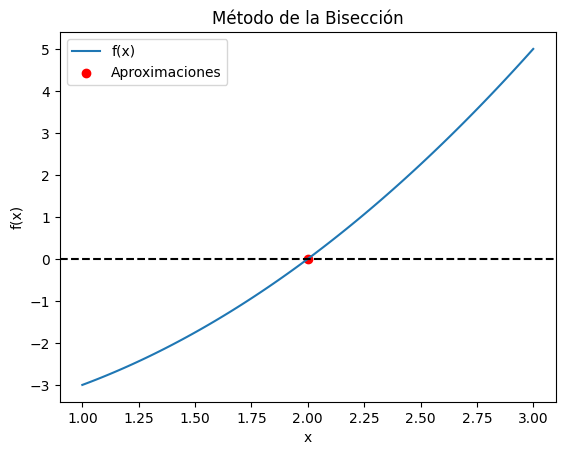

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def bisection_method(function, a, b, tolerance, max_iterations):
    if function(a) * function(b) >= 0:
        raise ValueError("La función no cumple con el teorema de Bolzano en el intervalo dado.")

    iteration = 0
    error_list = []
    approximation_list = []

    while (b - a) / 2 > tolerance and iteration < max_iterations:
        midpoint = (a + b) / 2
        approximation_list.append(midpoint)

        if function(midpoint) == 0:
            return midpoint, approximation_list, error_list
        elif function(midpoint) * function(a) < 0:
            b = midpoint
        else:
            a = midpoint

        error = abs((b - a) / 2)
        error_list.append(error)
        iteration += 1

    return (a + b) / 2, approximation_list, error_list

# Función de ejemplo
def example_function(x):
    return x**2 - 4

a = 1.0
b = 3.0
tolerance = 1e-6
max_iterations = 100

root, approximation_list, error_list = bisection_method(example_function, a, b, tolerance, max_iterations)

print("Raíz aproximada:", root)

# Crear gráfica si hay datos
if approximation_list:
    x_vals = np.linspace(a, b, 100)
    y_vals = example_function(x_vals)

    plt.plot(x_vals, y_vals, label='f(x)')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.scatter(approximation_list, [example_function(x) for x in approximation_list], color='red', label='Aproximaciones')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.title('Método de la Bisección')
    plt.show()

    # Crear tabla de datos si hay datos
    if error_list:
        print("\nTabla de datos:")
        print("+------------------+----------------------+----------------------+")
        print("| Iteración        | Aproximación         | Error                |")
        print("+------------------+----------------------+----------------------+")
        for i in range(len(approximation_list)):
            print(f"| {i+1:^16} | {approximation_list[i]:^20.8f} | {error_list[i]:^20.8f} |")
        print("+------------------+----------------------+----------------------+")


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Ecuación a resolver
def f(x):
    return x**3 - 2*x**2 + 3*x - 5

# Derivada de la ecuación
def df(x):
    return 3*x**2 - 4*x + 3

# Valores iniciales
a = 0
b = 1

# Tolerancia
tol = 1e-6

# Método de la bisección
def bisection(a, b, tol):
    fa = f(a)
    fb = f(b)
    if np.sign(fa) == np.sign(fb):
        print("Error: la función no tiene cambio de signo en el intervalo")
        return None
    while abs(b-a) > tol:
        c = (a + b) / 2
        fc = f(c)
        if np.sign(fa) == np.sign(fc):
            a = c
            fa = fc
        else:
            b = c
    return (a + b) / 2

# Solución
x = bisection(a, b, tol)

# Gráfica
if x is not None:
    x_vals = np.linspace(a, b, 100)
    y_vals = f(x_vals)
    plt.plot(x_vals, y_vals)
    plt.plot([a, b], [0, 0], 'k--')
    plt.plot([x, x], [0, f(x)], 'r--')
    plt.plot(x, f(x), 'ro')
    plt.grid()
    plt.show()
else:
    print("Error: la función no tiene cambio de signo en el intervalo")

# Tabla de datos
if x is not None:
    print("Intervalo: [{:.4f}, {:.4f}]".format(a, b))
    print("Solución: {:.4f}".format(x))
    print("Error: {:.4e}".format(abs(f(x))))
else:
    print("Error: la función no tiene cambio de signo en el intervalo")

Error: la función no tiene cambio de signo en el intervalo
Error: la función no tiene cambio de signo en el intervalo
Error: la función no tiene cambio de signo en el intervalo
